<a href="https://colab.research.google.com/github/finfrierson/data-science-fundamentals/blob/main/Project_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [113]:
import torch
import numpy as np
from torch import nn
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

I got my data from a survey conducted of LASA students done by me and my groupmates in our AP Stats final project. The goal with this data is to predict peoples relationship happiness based on the factors of stress, self value, friend quality, optimism, and response time to negative stimuli.

In [114]:
rs = pd.read_csv("https://raw.githubusercontent.com/finfrierson/data-science-fundamentals/refs/heads/main/Relationship%20Quality%20Survey%20(Responses)%20-%20Form%20Responses%201%20(1).csv").dropna()
#Dropping timestamp of when the survey was taken as that is irrelivent to response and would be an unnecesary addition.
rs.drop(columns=["Timestamp"],inplace=True)
rs.reset_index(drop=True,inplace=True)

In [115]:
rs

,Relationship Happiness,Stress,Optimism,Self Value,Situation Response,Friends
0,10,2,7,5,3,5
1,5,3,4,6,7,5
2,10,7,10,5,7,9
3,7,6,8,9,3,9
4,6,6,8,7,3,6
...,...,...,...,...,...,...
123,8,7,5,4,5,10
124,10,7,10,10,4,10
125,7,6,7,8,6,10
126,9,3,8,10,1,7


In [116]:
#Flipping these just so I can keep the most positive response as 10, least as 1.
rs["Stress"]=11-rs["Stress"]
rs["Situation Response"]=11-rs["Situation Response"]

In [117]:
#convert to a PyTorch tensor
r = rs["Relationship Happiness"].to_numpy()
rh = torch.from_numpy(r)
s = rs["Stress"].to_numpy()
stress = torch.from_numpy(s)
o = rs["Optimism"].to_numpy()
opti = torch.from_numpy(o)
val = rs["Self Value"].to_numpy()
sv = torch.from_numpy(val)
sr = rs["Situation Response"].to_numpy()
sitRes = torch.from_numpy(sr)
f = rs["Friends"].to_numpy()
fren = torch.from_numpy(f)

In [118]:
X = torch.cat((stress.unsqueeze(dim=1), opti.unsqueeze(dim=1), sv.unsqueeze(dim=1), sitRes.unsqueeze(dim=1), fren.unsqueeze(dim=1)), 1)
y = rh.unsqueeze(dim=1)

X

tensor([[ 9,  7,  5,  8,  5],
        [ 8,  4,  6,  4,  5],
        [ 4, 10,  5,  4,  9],
        [ 5,  8,  9,  8,  9],
        [ 5,  8,  7,  8,  6],
        [ 7, 10,  7,  8,  8],
        [ 5,  8, 10,  8,  8],
        [ 5, 10,  9,  9, 10],
        [ 2,  7, 10,  1,  8],
        [ 4,  8,  8,  5,  8],
        [ 5,  9,  9,  5,  9],
        [ 1,  7,  8,  5,  7],
        [ 5,  8,  9,  8,  4],
        [ 4,  8,  7,  5, 10],
        [ 2, 10,  8,  8, 10],
        [ 3,  1,  2, 10,  7],
        [ 7,  8,  8,  6, 10],
        [ 5,  8,  7,  8,  8],
        [ 6,  8,  7,  4,  8],
        [ 9,  7,  7,  8,  7],
        [ 2,  7, 10,  5,  9],
        [ 5,  9,  7,  7,  8],
        [ 3, 10,  7,  5, 10],
        [ 1,  7,  7,  3,  7],
        [ 3,  6,  6,  2,  8],
        [ 5,  8,  8,  8, 10],
        [ 1,  4,  1,  1, 10],
        [ 3,  6, 10, 10, 10],
        [ 4,  5, 10,  7, 10],
        [ 8,  8,  8,  5, 10],
        [ 5,  9,  5,  9,  7],
        [ 4,  5,  6,  3,  8],
        [ 7, 10,  9,  4,  9],
        [ 

In [119]:
scaler = StandardScaler()
height_scaled = scaler.fit_transform(
    X #makes it a column vector
    )

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    height_scaled, y, test_size=0.2,
)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

<ipython-input-119-b4a5b5b9d1f9>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32)
<ipython-input-119-b4a5b5b9d1f9>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.float32)


#Model 1

First, I'm trying a relatively simple model. Only one additional layer, low # nodes, a standard lr, and a medium amount of epochs.

In [120]:
model_00 = nn.Sequential(
        nn.Linear(in_features=5, out_features=2),
        nn.ReLU(), #Activation Function
        nn.Linear(in_features=2, out_features=2), # Extra layer
        nn.ReLU(),
        nn.Linear(in_features=2, out_features=1),
    )

In [121]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=model_00.parameters(),
                            lr=0.01)

In [122]:
epochs = 2000

for epoch in range(epochs):
    # Training
    model_00.train()
    # Makes predictions
    y_pred = model_00(X_train)
    # Calculate loss
    loss = loss_fn(y_pred.squeeze(), y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model_00.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # makes predictions with test data
      test_pred = model_00(X_test)
      # calculate the loss with test data
      test_loss = loss_fn(test_pred, y_test)

    # Print out the loss values
    if epoch % 200 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([102, 1])) that is different to the input size (torch.Size([102])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 | Train loss: 67.46481, Test loss: 65.67657
Epoch: 200 | Train loss: 3.33353, Test loss: 1.59270
Epoch: 400 | Train loss: 3.33184, Test loss: 1.56774
Epoch: 600 | Train loss: 3.33172, Test loss: 1.56638
Epoch: 800 | Train loss: 3.33165, Test loss: 1.56696
Epoch: 1000 | Train loss: 3.33160, Test loss: 1.56762
Epoch: 1200 | Train loss: 3.33157, Test loss: 1.56817
Epoch: 1400 | Train loss: 3.33155, Test loss: 1.56862
Epoch: 1600 | Train loss: 3.33154, Test loss: 1.56898
Epoch: 1800 | Train loss: 3.33153, Test loss: 1.56927


In [123]:
model_00.eval()
# Make predictions
with torch.inference_mode():
    y_preds = model_00(X_test)

<ipython-input-124-77c37b9ec0cd>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


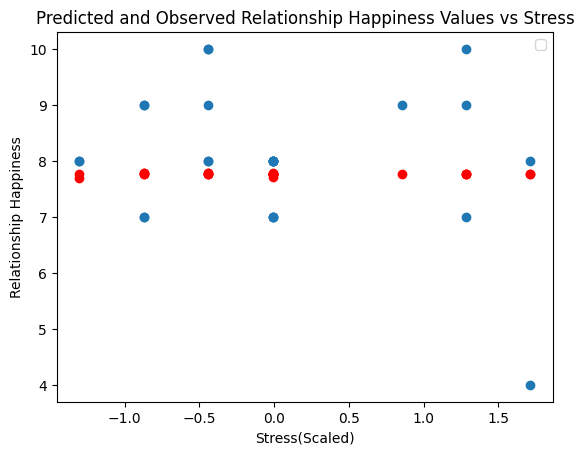

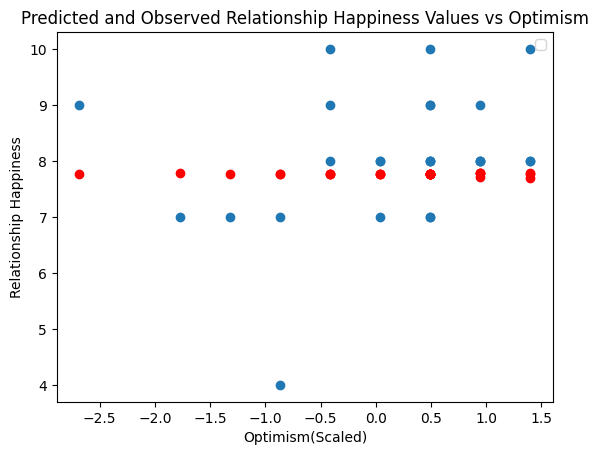

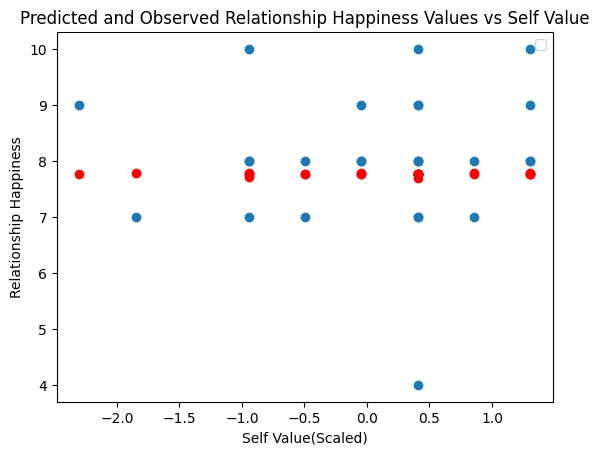

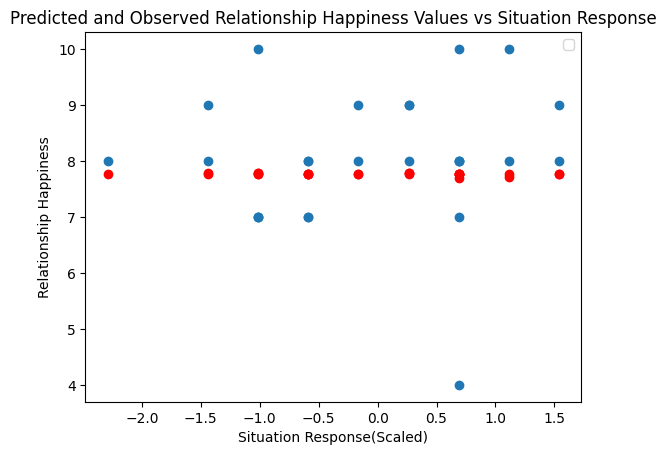

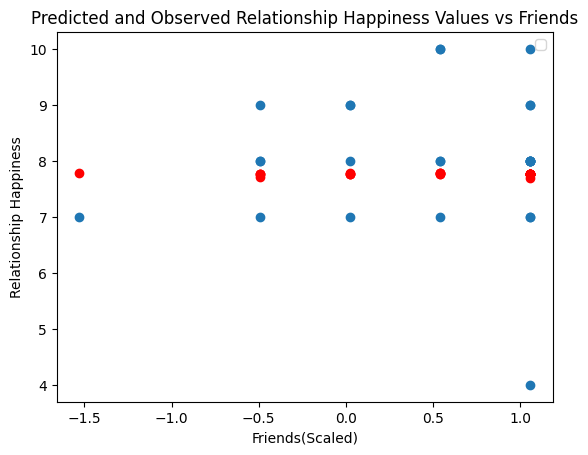

In [124]:
#Modeling
predictors = ["Stress", "Optimism", "Self Value", "Situation Response", "Friends"]
for num in range(5):
  plt.scatter(X_test[:,num].detach().numpy(),y_preds.detach().numpy(), color="Red")
  plt.scatter(X_test[:,num].detach().numpy(),y_test)
  plt.xlabel(predictors[num] +"(Scaled)")
  plt.ylabel("Relationship Happiness")
  plt.title("Predicted and Observed Relationship Happiness Values vs "+ predictors[num])
  plt.legend()
  plt.show()

These graphs show the modeled predictions verses each predictor individually, as there is no easy way to compare with all 5 at once in an interpretable way.

The test loss from this model is pretty horrible. From the values, the problem is most likely either a disfunctional model, or a lack of correlation in the data. From the graph, it seems more likely that it just cant be predicted well, as the predicted line is roughly linear and horizontal, which does nbot match accurately with any of the predictors, and the predictors values are extremely scattered as a whole. I will try two more in depth models - adjusting number of nodes, neurons, and epochs - to try to see if the model is the problem.

#Model 2

In [125]:
model_01 = nn.Sequential(
        nn.Linear(in_features=5, out_features=10), # Increased neurons
        nn.ReLU(),
        nn.Linear(in_features=10, out_features=10), # More extra layers
        nn.ReLU(),
        nn.Linear(in_features=10, out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10, out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10, out_features=1),
    )

In [126]:
loss_fn = nn.MSELoss()

optimizer = torch.optim.Adam(params=model_01.parameters(),
                                 lr=0.1) #Higher LR to make runtime lower.

In [127]:
epochs = 4000

for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    model_01.train()

    # 1. Forward pass; makes predictions
    y_pred = model_01(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred.squeeze(), y_train)

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    model_01.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = model_01(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 200 == 0: #prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 67.00574, Test loss: 60.78664
Epoch: 200 | Train loss: 3.33301, Test loss: 1.56610
Epoch: 400 | Train loss: 3.33166, Test loss: 1.56385
Epoch: 600 | Train loss: 3.33154, Test loss: 1.56713
Epoch: 800 | Train loss: 3.33152, Test loss: 1.56770
Epoch: 1000 | Train loss: 3.33151, Test loss: 1.56772
Epoch: 1200 | Train loss: 3.33151, Test loss: 1.56765
Epoch: 1400 | Train loss: 3.33151, Test loss: 1.56756
Epoch: 1600 | Train loss: 3.33151, Test loss: 1.56749
Epoch: 1800 | Train loss: 3.33151, Test loss: 1.56743
Epoch: 2000 | Train loss: 3.33151, Test loss: 1.56739
Epoch: 2200 | Train loss: 3.33151, Test loss: 1.56735
Epoch: 2400 | Train loss: 3.33151, Test loss: 1.56733
Epoch: 2600 | Train loss: 3.33151, Test loss: 1.56730
Epoch: 2800 | Train loss: 3.33151, Test loss: 1.56729
Epoch: 3000 | Train loss: 3.33151, Test loss: 1.56728
Epoch: 3200 | Train loss: 3.33151, Test loss: 1.56727
Epoch: 3400 | Train loss: 3.33151, Test loss: 1.56726
Epoch: 3600 | Train loss: 3.33198

In [128]:
model_01.eval()

# Make predictions
with torch.inference_mode():
    y_preds = model_01(X_test)

<ipython-input-129-77c37b9ec0cd>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


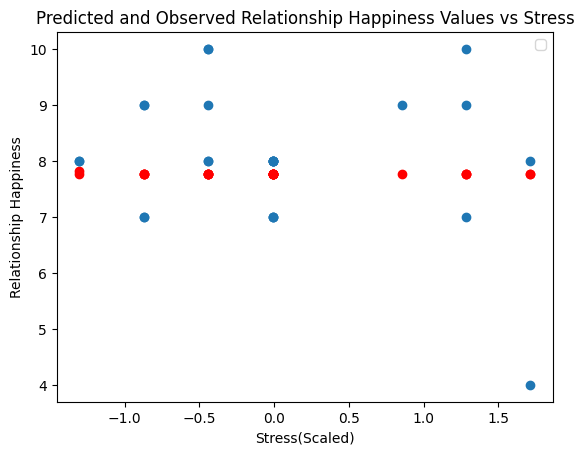

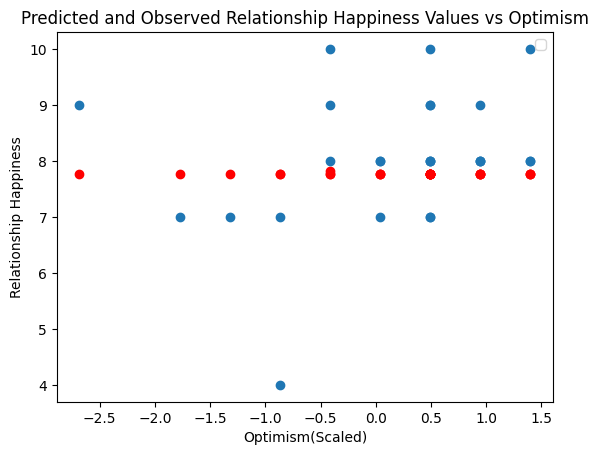

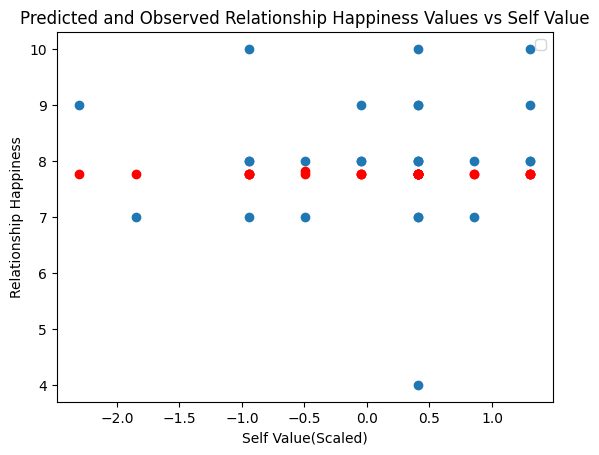

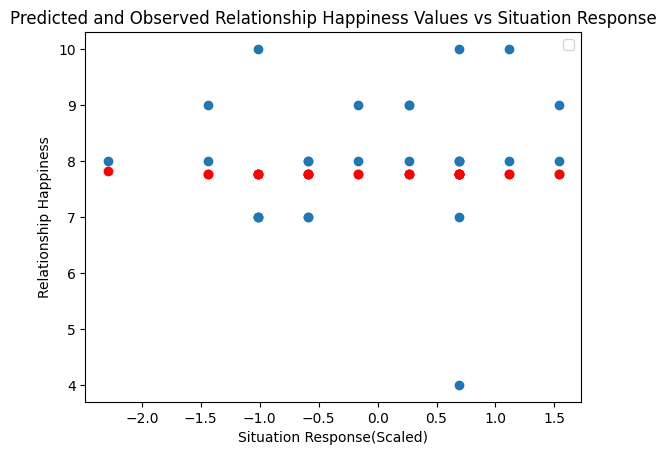

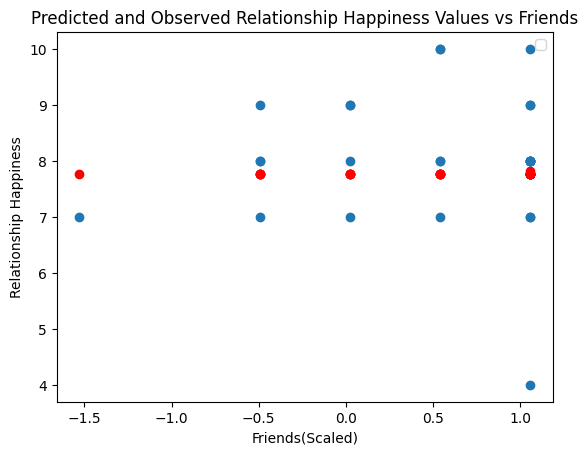

In [129]:
#Modeling
predictors = ["Stress", "Optimism", "Self Value", "Situation Response", "Friends"]
for num in range(5):
  plt.scatter(X_test[:,num].detach().numpy(),y_preds.detach().numpy(), color="Red")
  plt.scatter(X_test[:,num].detach().numpy(),y_test)
  plt.xlabel(predictors[num] +"(Scaled)")
  plt.ylabel("Relationship Happiness")
  plt.title("Predicted and Observed Relationship Happiness Values vs "+ predictors[num])
  plt.legend()
  plt.show()

This model ended up generating almost the exact same results unfortunately. I will try one last model with much higher numbers of neurons and layers as a final attempt.

#Model 3

In [130]:
model_02 = nn.Sequential(
        nn.Linear(in_features=5, out_features=128), # Increased neurons again
        nn.ReLU(),
        nn.Linear(in_features=128, out_features=128), # Even more layers
        nn.ReLU(),
        nn.Linear(in_features=128, out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128, out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128, out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128, out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128, out_features=1),
    )

In [131]:
loss_fn = nn.MSELoss()

optimizer = torch.optim.Adam(params=model_02.parameters(),
                                 lr=0.3) #lr increased again to reduce runtime. With so many neurons and layers, much lower would take forever to run.

In [132]:
epochs = 6000

for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    model_02.train()

    # 1. Forward pass; makes predictions
    y_pred = model_02(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred.squeeze(), y_train)

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    model_02.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = model_02(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 200 == 0: #prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 63.94409, Test loss: 26585625264128.00000
Epoch: 200 | Train loss: 3.33151, Test loss: 1.56828
Epoch: 400 | Train loss: 3.33151, Test loss: 1.56819
Epoch: 600 | Train loss: 3.33151, Test loss: 1.56819
Epoch: 800 | Train loss: 3.33151, Test loss: 1.56819
Epoch: 1000 | Train loss: 3.33151, Test loss: 1.56819
Epoch: 1200 | Train loss: 3.33151, Test loss: 1.56819
Epoch: 1400 | Train loss: 3.33151, Test loss: 1.56819
Epoch: 1600 | Train loss: 3.33151, Test loss: 1.56819
Epoch: 1800 | Train loss: 3.33151, Test loss: 1.56819
Epoch: 2000 | Train loss: 3.33151, Test loss: 1.56819
Epoch: 2200 | Train loss: 3.33151, Test loss: 1.56819
Epoch: 2400 | Train loss: 3.33151, Test loss: 1.56819
Epoch: 2600 | Train loss: 3.33151, Test loss: 1.56819
Epoch: 2800 | Train loss: 3.33151, Test loss: 1.56819
Epoch: 3000 | Train loss: 3.33151, Test loss: 1.56819
Epoch: 3200 | Train loss: 3.33151, Test loss: 1.56820
Epoch: 3400 | Train loss: 3.33151, Test loss: 1.56863
Epoch: 3600 | Train l

In [133]:
model_01.eval()

# Make predictions
with torch.inference_mode():
    y_preds = model_01(X_test)

<ipython-input-134-77c37b9ec0cd>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


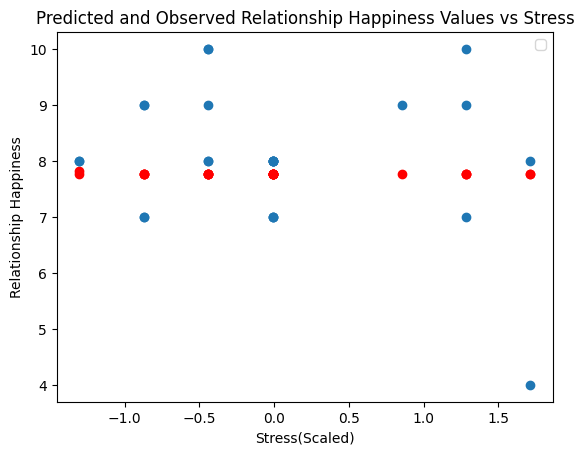

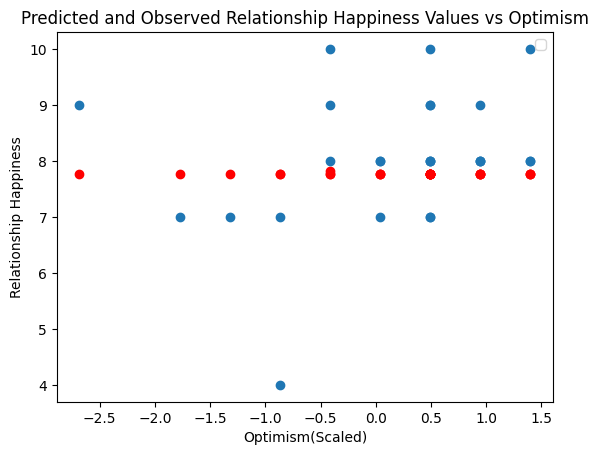

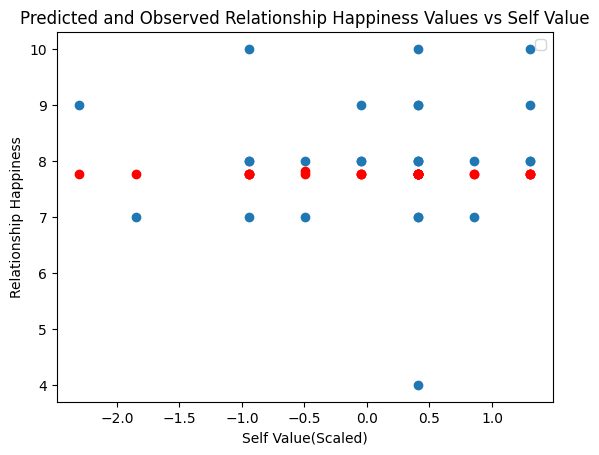

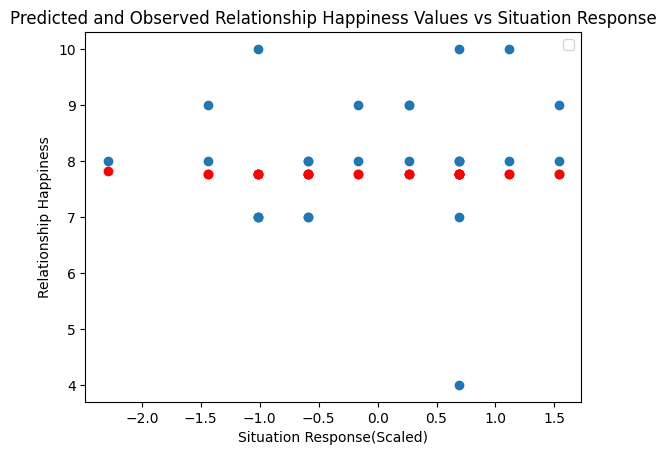

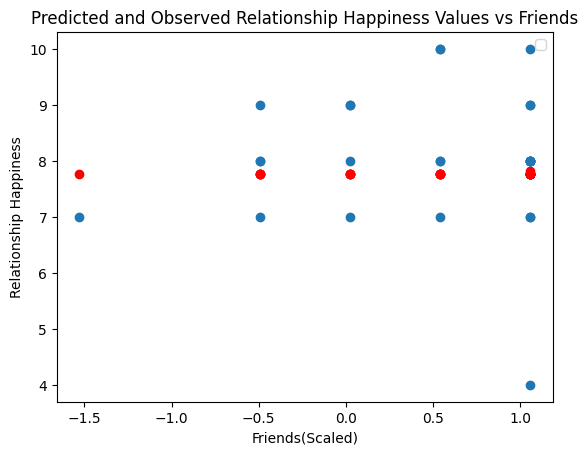

In [134]:
#Modeling
predictors = ["Stress", "Optimism", "Self Value", "Situation Response", "Friends"]
for num in range(5):
  plt.scatter(X_test[:,num].detach().numpy(),y_preds.detach().numpy(), color="Red")
  plt.scatter(X_test[:,num].detach().numpy(),y_test)
  plt.xlabel(predictors[num] +"(Scaled)")
  plt.ylabel("Relationship Happiness")
  plt.title("Predicted and Observed Relationship Happiness Values vs "+ predictors[num])
  plt.legend()
  plt.show()

With no change between the three models, it leads me to believe that I do not have much of a trend that can be accurately captured by a model, leading me to still have a value way higher than expected. If I were to want to get a more accurate model, I would need to choose a different model type, perhaps a BART model. The actual data can also be seen in all 5 graphs to be extremely spread apart. Another potential model to try is using a singular predictor, rather than them as a collective, however, as a whole their predictions are so poor that it is likely any individual one would be much better.

#Conclusion

Due to the extreme variance in the data points, relationship happiness cant be captured well by a model with the predictors I have. This is shown in the extroardinarily high test values, at roughly 3.3 for each model - extremely high for a 1 to 10 scale. This average 3.3 difference from the model makes me believe that no matter how modeled by a neural network, the data just would not work for this.